In [1]:
#Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Keras packages for neural network design
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam

train_data = np.array(pd.read_csv(r'C:\Users\Lenovo\PycharmProjects\lab4\input\fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv(r'C:\Users\Lenovo\PycharmProjects\lab4\input\fashion-mnist_test.csv'))

Using TensorFlow backend.


In [2]:
x_train = train_data[:, 1:785]
y_train = train_data[:, 0]

x_test = test_data[:, 1:785]
y_test = test_data[:, 0]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
y_val = np_utils.to_categorical(y_val,10)

In [5]:
# show the loss and accuracy
def charts(model):
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']

    # loss plot
    tra = plt.plot(loss)
    val = plt.plot(val_loss, 'r')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend(["Training", "Validation"])
    
    plt.show()

    # accuracy plot
    plt.plot(acc)
    plt.plot(val_acc, 'r')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Accuracy')
    plt.legend(['Training', 'Validation'], loc=4)
    plt.show()

In [6]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(28, 28, 1)))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))

model1.add(Dense(128, activation = 'relu'))

model1.add(Dense(10, activation='softmax'))

model1.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

history_model1 = model1.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=128,epochs=50,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.5195 - accuracy: 0.8164 - val_loss: 0.3945 - val_accuracy: 0.8626
Epoch 2/50
48000/48000 [==============================] - 4s 74us/step - loss: 0.3818 - accuracy: 0.8619 - val_loss: 0.3627 - val_accuracy: 0.8683
Epoch 3/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.3435 - accuracy: 0.8748 - val_loss: 0.3449 - val_accuracy: 0.8744
Epoch 4/50
48000/48000 [==============================] - 6s 126us/step - loss: 0.3152 - accuracy: 0.8838 - val_loss: 0.3342 - val_accuracy: 0.8757
Epoch 5/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.2929 - accuracy: 0.8918 - val_loss: 0.3122 - val_accuracy: 0.8842
Epoch 6/50
48000/48000 [==============================] - 6s 127us/step - loss: 0.2793 - accuracy: 0.8968 - val_loss: 0.3397 - val_accuracy: 0.8731
Epoch 7/50
48000/48000 [==============================] - 5s 100us

In [7]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Confirm loss and accuracy on the test data
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score1[0]))
print('Test accuracy: {:.4f}'.format(score1[1]))

Test loss: 0.4873
Test accuracy: 0.8987


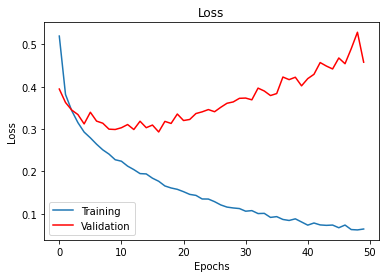

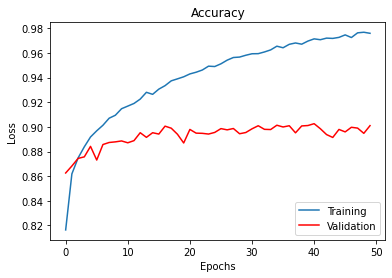

In [9]:
charts(history_model1)

In [10]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(28, 28, 1)))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

history_model2 = model2.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=128,epochs=50,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 83us/step - loss: 0.5821 - accuracy: 0.7914 - val_loss: 0.4099 - val_accuracy: 0.8535
Epoch 2/50
48000/48000 [==============================] - 7s 150us/step - loss: 0.4166 - accuracy: 0.8490 - val_loss: 0.3814 - val_accuracy: 0.8634
Epoch 3/50
48000/48000 [==============================] - 5s 97us/step - loss: 0.3777 - accuracy: 0.8609 - val_loss: 0.3680 - val_accuracy: 0.8587
Epoch 4/50
48000/48000 [==============================] - 6s 135us/step - loss: 0.3506 - accuracy: 0.8734 - val_loss: 0.3284 - val_accuracy: 0.8798
Epoch 5/50
48000/48000 [==============================] - 7s 146us/step - loss: 0.3351 - accuracy: 0.8767 - val_loss: 0.3180 - val_accuracy: 0.8833
Epoch 6/50
48000/48000 [==============================] - 4s 80us/step - loss: 0.3202 - accuracy: 0.8823 - val_loss: 0.3054 - val_accuracy: 0.8864
Epoch 7/50
48000/48000 [==============================] - 7s 156u

In [11]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________

In [12]:
#Confirm loss and accuracy on the test data
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score2[0]))
print('Test accuracy: {:.4f}'.format(score2[1]))

Test loss: 0.3293
Test accuracy: 0.9033


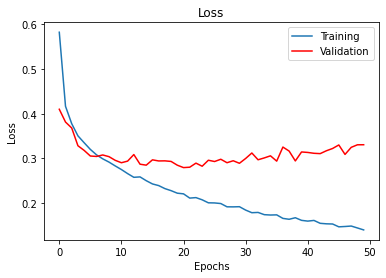

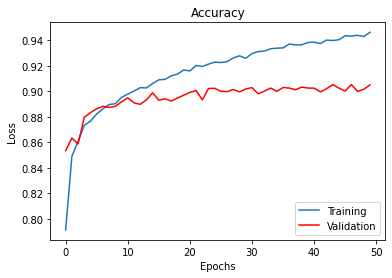

In [13]:
charts(history_model2)

In [14]:
model3 = Sequential()
model3.add(InputLayer(input_shape=(28, 28, 1)))

model3.add(Conv2D(24, kernel_size=3, activation='relu', padding='same'))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.2))

model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

history_model3 = model3.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=128,epochs=20,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 112s 2ms/step - loss: 0.4712 - accuracy: 0.8329 - val_loss: 0.3156 - val_accuracy: 0.8820
Epoch 2/20
48000/48000 [==============================] - 111s 2ms/step - loss: 0.2993 - accuracy: 0.8910 - val_loss: 0.3025 - val_accuracy: 0.8909
Epoch 3/20
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2449 - accuracy: 0.9104 - val_loss: 0.2520 - val_accuracy: 0.9077
Epoch 4/20
48000/48000 [==============================] - 109s 2ms/step - loss: 0.2072 - accuracy: 0.9221 - val_loss: 0.2509 - val_accuracy: 0.9076
Epoch 5/20
48000/48000 [==============================] - 109s 2ms/step - loss: 0.1798 - accuracy: 0.9325 - val_loss: 0.2486 - val_accuracy: 0.9107
Epoch 6/20
48000/48000 [==============================] - 117s 2ms/step - loss: 0.1541 - accuracy: 0.9418 - val_loss: 0.2568 - val_accuracy: 0.9112
Epoch 7/20
48000/48000 [==============================] - 109s

In [15]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 24)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               9634304   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [16]:
#Confirm loss and accuracy on the test data
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score3[0]))
print('Test accuracy: {:.4f}'.format(score3[1]))

Test loss: 0.4356
Test accuracy: 0.9150


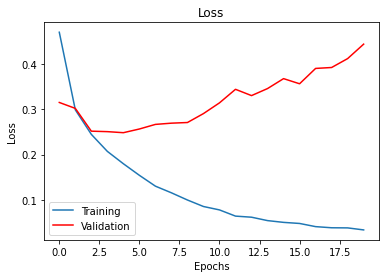

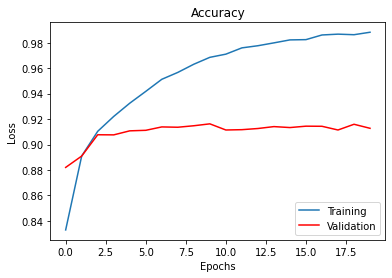

In [17]:
charts(history_model3)

In [18]:
model4 = Sequential()
model4.add(InputLayer(input_shape=(28, 28, 1)))

model4.add(Conv2D(24, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))

model4.add(Flatten())

model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))

model4.add(Dense(128, activation = 'relu'))
model4.add(Dropout(0.2))

model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

history_model4 = model4.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=128,epochs=20,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 31s 652us/step - loss: 0.6060 - accuracy: 0.7764 - val_loss: 0.3899 - val_accuracy: 0.8549
Epoch 2/20
48000/48000 [==============================] - 32s 659us/step - loss: 0.3920 - accuracy: 0.8567 - val_loss: 0.3160 - val_accuracy: 0.8813
Epoch 3/20
48000/48000 [==============================] - 32s 658us/step - loss: 0.3368 - accuracy: 0.8780 - val_loss: 0.2774 - val_accuracy: 0.8986
Epoch 4/20
48000/48000 [==============================] - 31s 640us/step - loss: 0.3082 - accuracy: 0.8883 - val_loss: 0.2672 - val_accuracy: 0.9016
Epoch 5/20
48000/48000 [==============================] - 31s 640us/step - loss: 0.2848 - accuracy: 0.8966 - val_loss: 0.2438 - val_accuracy: 0.9116
Epoch 6/20
48000/48000 [==============================] - 31s 642us/step - loss: 0.2635 - accuracy: 0.9036 - val_loss: 0.2310 - val_accuracy: 0.9136
Epoch 7/20
48000/48000 [==============================] 

In [19]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        6944      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)             

In [20]:
#Confirm loss and accuracy on the test data
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score4[0]))
print('Test accuracy: {:.4f}'.format(score4[1]))

Test loss: 0.2108
Test accuracy: 0.9266


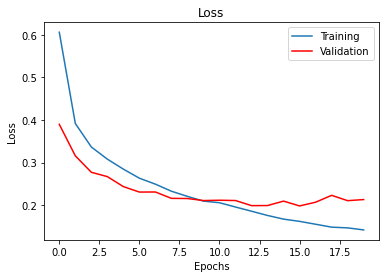

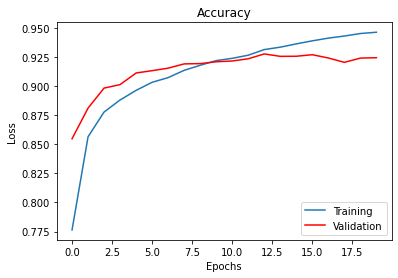

In [21]:
charts(history_model4)

In [22]:
model5 = Sequential()
model5.add(InputLayer(input_shape=(28, 28, 1)))

model5.add(Conv2D(24, kernel_size=3, activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.2))

model5.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model5.add(Dropout(0.3))

model5.add(Flatten())

model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(128, activation = 'relu'))
model5.add(Dropout(0.3))

model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer=Adam(lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

history_model5 = model5.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=128,epochs=20,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 67s 1ms/step - loss: 0.5784 - accuracy: 0.7886 - val_loss: 0.7549 - val_accuracy: 0.8587
Epoch 2/20
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3709 - accuracy: 0.8640 - val_loss: 0.2857 - val_accuracy: 0.8944
Epoch 3/20
48000/48000 [==============================] - 67s 1ms/step - loss: 0.3253 - accuracy: 0.8818 - val_loss: 0.2608 - val_accuracy: 0.9032
Epoch 4/20
48000/48000 [==============================] - 67s 1ms/step - loss: 0.2976 - accuracy: 0.8928 - val_loss: 0.2439 - val_accuracy: 0.9116
Epoch 5/20
48000/48000 [==============================] - 67s 1ms/step - loss: 0.2777 - accuracy: 0.8995 - val_loss: 0.2253 - val_accuracy: 0.9143
Epoch 6/20
48000/48000 [==============================] - 67s 1ms/step - loss: 0.2677 - accuracy: 0.9017 - val_loss: 0.2238 - val_accuracy: 0.9149
Epoch 7/20
48000/48000 [==============================] - 67s 1ms/st

In [23]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 24)        96        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        6944      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 32)         

In [24]:
#Confirm loss and accuracy on the test data
score5 = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score5[0]))
print('Test accuracy: {:.4f}'.format(score5[1]))

Test loss: 0.1899
Test accuracy: 0.9279


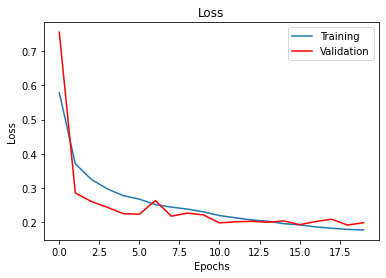

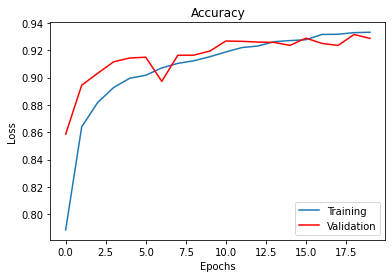

In [25]:
charts(history_model5)